In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os


## Loading class module

In [2]:
%run ../stochastic_fractal_m.py

directory  /home/shahnoor/projects/Stochastic-Fractal/data/temp  is created


In [3]:
alphap = 1  # any real positive value larger than 0.5, but anaylytical plot exists only for alpha=1,2,3
probp = 0.75 # any value between 0 and 1

ensemble_sizep = 4_000
min_iterationp = 100_000
bin_sizep = 0.0001

bin_sizep = 1e-7 # for alpha=1

In [4]:
expon = 2 * alphap - 1

In [5]:
header={
    'p':0.75,
    'alpha':alphap,
    'beta':alphap-1,
    'ensemble_size':ensemble_sizep,
    'min_iterationp':min_iterationp,
    'bin_sizep':bin_sizep,
    'expon':expon,    
}

## Defining directory

In [6]:
dir_data = "../data/alpha{}/".format(alphap)
dir_fig  ="../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../data/temp/alpha{}/".format(alphap)
dir_fig  ="../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../data/temp/alpha1/  is created
directory  ../figures/temp/alpha1/  is created


In [7]:
figure_name_collapse = dir_fig + "pn_data_coll_alpha_{}.pdf".format(alphap)
figure_name = dir_fig + "pn_alpha_{}.pdf".format(alphap)

## Simulation using class

In [8]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 1, 'probability': 0.75}
Turning on logging


In [9]:
# total_iteration = 10000
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)

In [10]:
ana_soln = AnalyticSoln()

## Other functions

In [11]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [12]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [13]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

## Simulation  and plot

In [14]:
def plot_data_simulation(total_iteration, ens_data, bin_size=bin_sizep):
    """
    data collapse points from simulation
    """
    df = ana_soln.find_df(alphap,probp)
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data, bin_size)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))

    return xi, phi 

In [15]:
def plot_data_fitted(total_iteration, ens_data, bin_size=bin_sizep):
    xi, phi  = plot_data_simulation(total_iteration, ens_data, bin_sizep)
    xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)
    a1_sum, a2_sum = fitting_parameter(phi,phi_analytic)
    return xi, phi, a1_sum, a2_sum

In [16]:
# def plot_data(total_iteration):
#     df = ana_soln.find_df(alphap,probp)
    
#     # doing the simulation here
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
#     x,y = histrogram_data(ens_data)
#     xi = x*total_iteration**(1/(2*alphap-1))
#     phi = y/(total_iteration**((1+df)/(2*alphap-1)))
#     xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
# #     print(len(phi_analytic))
#     a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
#     print(a1_sum, ", ", a2_sum)
#     return xi, phi, a1_sum, a2_sum

## Simulation

In [17]:
import datetime
def get_time_stamp():
    now = datetime.datetime.now()
    return now.strftime("%Y%m%d_%H%M%S")

In [18]:
ens_data_dct = dict()
# for i in range(3):
#     time_t = min_iterationp*(i+1)
#     ens_data_dct[time_t] = stochastic_frag.run_ensemble(ensemble_sizep, time_t)  # from class
#     print(time_t)

In [19]:
time_t = min_iterationp*1
ens_data_dct[time_t] = stochastic_frag.run_ensemble_parallel(ensemble_sizep, time_t, 16)  # from class
# print(time_t)

filename = "alpha_{}_p_75_true_lengths_t_{}_{}.txt".format(alphap, time_t, get_time_stamp())
print(filename)
header['time_t'] = time_t
np.savetxt(filename, ens_data_dct[time_t], header=json.dumps(header))



AttributeError: 'TrueLengths_v2' object has no attribute 'run_ensemble_parallel'

In [20]:
time_t = min_iterationp*2
ens_data_dct[time_t] = stochastic_frag.run_ensemble_parallel(ensemble_sizep, time_t, 16)  # from class
# print(time_t)

filename = "alpha_{}_p_75_true_lengths_t_{}_{}.txt".format(alphap, time_t, get_time_stamp())
print(filename)
header['time_t'] = time_t
np.savetxt(filename, ens_data_dct[time_t], header=json.dumps(header))


Maybe you don't need multi threading
thread_counts  16
Total time spent  769.7354006767273  sec
Total time spent  839.1208148002625  sec
Total time spent  854.6050260066986  sec
Total time spent  864.2368998527527  sec
Total time spent  865.7731454372406  sec
Total time spent  868.7922103404999  sec
Total time spent  895.9702594280243  sec
Total time spent  931.3760092258453  sec
Total time spent  940.4861009120941  sec
Total time spent  948.5727074146271  sec
Total time spent  950.5531132221222  sec
Total time spent  967.428688287735  sec
Total time spent  969.2140052318573  sec
Total time spent  979.9381577968597  sec
Total time spent  1004.8682763576508  sec
Total time spent  1048.799485206604  sec
alpha_1_p_75_true_lengths_t_200000_20220301_100849.txt


In [21]:
time_t = min_iterationp*3
ens_data_dct[time_t] = stochastic_frag.run_ensemble_parallel(ensemble_sizep, time_t, 16)  # from class
# print(time_t)

filename = "alpha_{}_p_75_true_lengths_t_{}_{}.txt".format(alphap, time_t, get_time_stamp())
print(filename)
header['time_t'] = time_t
np.savetxt(filename, ens_data_dct[time_t], header=json.dumps(header))


Maybe you don't need multi threading
thread_counts  16
Total time spent  1537.9595222473145  sec
Total time spent  1539.1052737236023  sec
Total time spent  1611.9757294654846  sec
Total time spent  1614.707495689392  sec
Total time spent  1631.7909452915192  sec
Total time spent  1639.3118801116943  sec
Total time spent  1672.3539624214172  sec
Total time spent  1679.3274936676025  sec
Total time spent  1683.4227039813995  sec
Total time spent  1721.756073474884  sec
Total time spent  1752.692456960678  sec
Total time spent  1772.5546288490295  sec
Total time spent  1774.2902150154114  sec
Total time spent  1777.6042656898499  sec
Total time spent  1778.6355016231537  sec
Total time spent  1878.826875925064  sec
alpha_1_p_75_true_lengths_t_300000_20220301_104104.txt


In [22]:
# ens_data_dct[time_t]

# Read from file

In [23]:
import glob
files = glob.glob("alpha_{}_p_75_true_lengths_t*.txt".format(alphap))
# print(files)
ens_data_dct = dict()
for file in files:
    with open(file) as f:
        line = f.readline()
        head = json.loads(line[1:])
        print(head)
        time_t = head["time_t"] 
        ensemble_size = head["ensemble_size"]
        pass
    if ensemble_size < 2000:
        continue
    newdata = np.loadtxt(file)
    if time_t in ens_data_dct.keys():
        np.append(ens_data_dct[time_t], newdata)
    else:
        ens_data_dct[time_t]=newdata
    pass

{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 2000, 'min_iterationp': 100000, 'bin_sizep': 1e-07, 'expon': 1, 'time_t': 200000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 2000, 'min_iterationp': 100000, 'bin_sizep': 0.0001, 'expon': 1, 'time_t': 300000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 2000, 'min_iterationp': 100000, 'bin_sizep': 0.0001, 'expon': 1, 'time_t': 100000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 4000, 'min_iterationp': 100000, 'bin_sizep': 1e-07, 'expon': 1, 'time_t': 300000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 2000, 'min_iterationp': 100000, 'bin_sizep': 0.0001, 'expon': 1, 'time_t': 200000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 4000, 'min_iterationp': 100000, 'bin_sizep': 1e-07, 'expon': 1, 'time_t': 100000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 4000, 'min_iterationp': 100000, 'bin_sizep': 1e-07, 'expon': 1, 'time_t': 200000}
{'p': 0.75, 'alpha': 1, 'beta': 0, 'ensemble_size': 4000, '

In [24]:
files

['alpha_1_p_75_true_lengths_t_200000_20220228_220304.txt',
 'alpha_1_p_75_true_lengths_t_300000_20220228_205106.txt',
 'alpha_1_p_75_true_lengths_t_100000_20220228_202054.txt',
 'alpha_1_p_75_true_lengths_t_300000_20220301_012932.txt',
 'alpha_1_p_75_true_lengths_t_200000_20220228_203142.txt',
 'alpha_1_p_75_true_lengths_t_100000_20220301_095047.txt',
 'alpha_1_p_75_true_lengths_t_200000_20220301_005615.txt',
 'alpha_1_p_75_true_lengths_t_200000_20220301_100849.txt',
 'alpha_1_p_75_true_lengths_t_300000_20220301_002824.txt',
 'alpha_1_p_75_true_lengths_t_1000_20220228_201632.txt',
 'alpha_1_p_75_true_lengths_t_100000_20220228_223623.txt',
 'alpha_1_p_75_true_lengths_t_1000_20220228_201627.txt',
 'alpha_1_p_75_true_lengths_t_300000_20220228_222124.txt',
 'alpha_1_p_75_true_lengths_t_100000_20220301_003831.txt',
 'alpha_1_p_75_true_lengths_t_1000.txt',
 'alpha_1_p_75_true_lengths_t_300000_20220301_104104.txt',
 'alpha_1_p_75_true_lengths_t_200000_20220228_231511.txt',
 'alpha_1_p_75_true

In [25]:
data_dict = {}
a1_sum, a2_sum = 0,0
for time_t in ens_data_dct.keys():
   
    if alphap in [1,2,3]:
        print("alpha is within known values")
        xi, phi, a1, a2 = plot_data_fitted(time_t, ens_data_dct[time_t], bin_sizep)
    else:
        xi, phi = plot_data_simulation(time_t,  ens_data_dct[time_t], bin_sizep)
        a1, a2 = 1, 1
        pass
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

alpha is within known values
alpha is within known values
alpha is within known values


In [26]:
# print(data_dict.keys())
# print(a1_sum)
# print(a2_sum)

### Saving data for later use

In [27]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
#     np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


../figures/temp/alpha1/pn_data_coll_alpha_1.pdf
../figures/temp/alpha1/pn_data_coll_alpha_1.eps


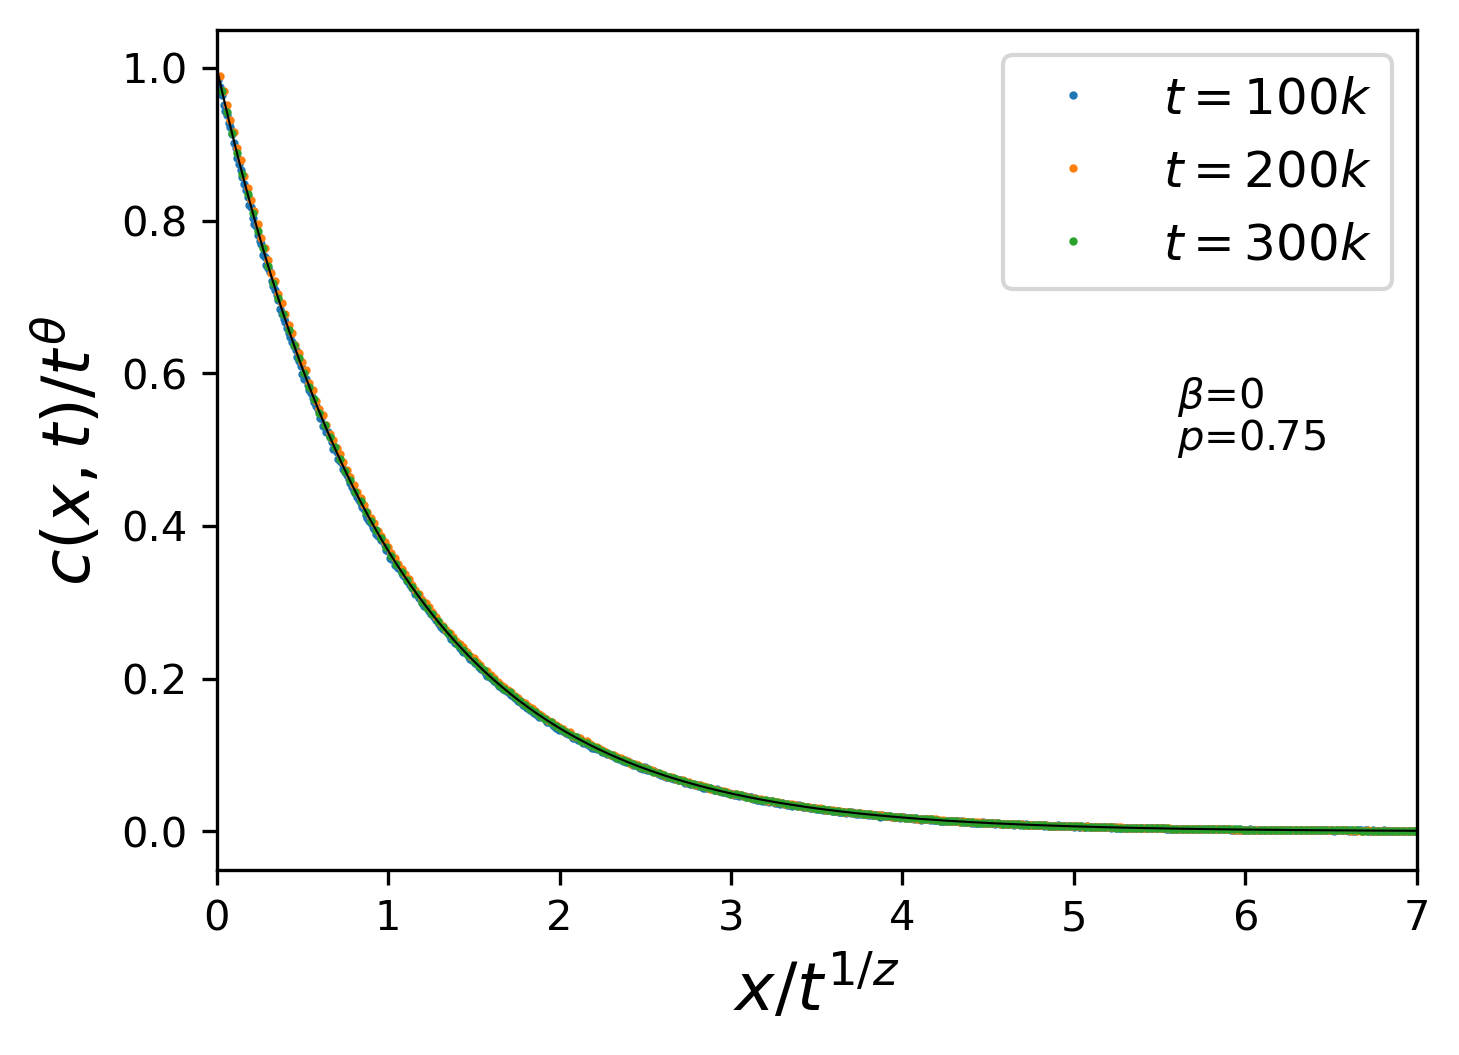

In [40]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

if alphap in [1,2,3]:
    xi_th = np.linspace(0,7,1000)
    xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
    plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1, prop={'size': 12})
plt.xlabel(r"$x/t^{1/z}$",  fontsize=16)
plt.ylabel(r"$c(x,t)/t^\theta$",  fontsize=16)
plt.xlim([0, 7])
plt.text(0.8, 0.55, r"$\beta$={}".format(alphap-1), transform = axes.transAxes)
plt.text(0.8, 0.5, r"$p$={}".format(probp), transform = axes.transAxes)

axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name_collapse)
plt.savefig(figure_name_collapse)
print(figure_name_collapse.split("pdf")[0]+"eps")
plt.savefig(figure_name_collapse.split("pdf")[0]+"eps")

../figures/temp/alpha1/pn_alpha_1.pdf
../figures/temp/alpha1/pn_alpha_1.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


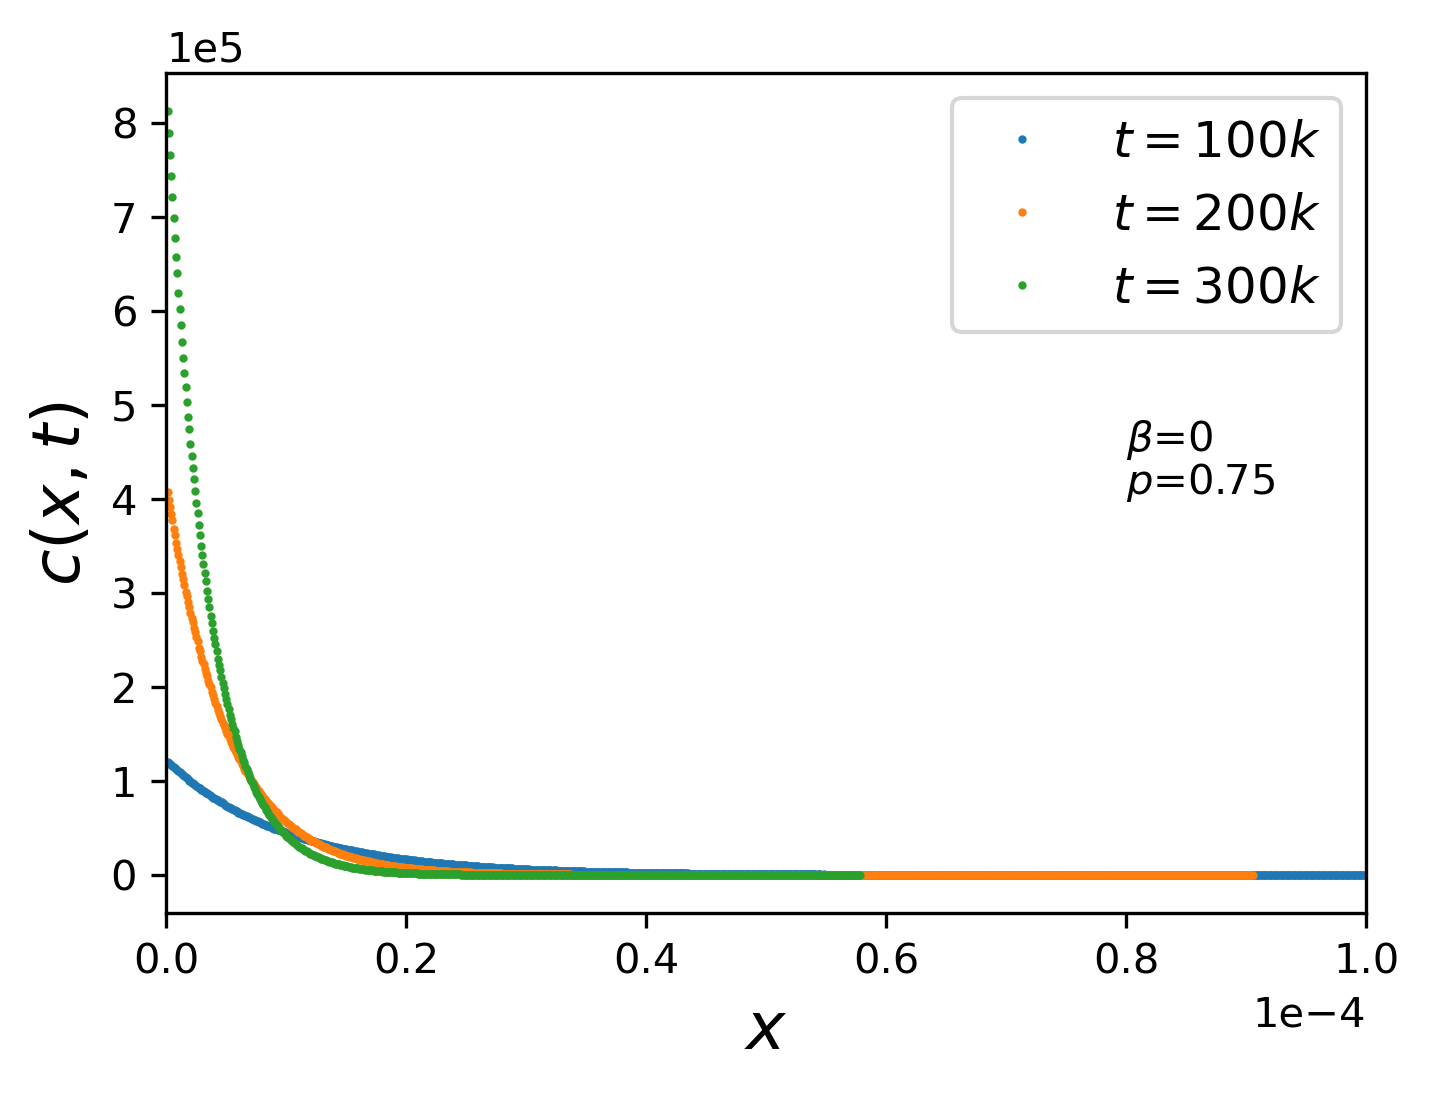

In [36]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = histrogram_data(ens_data_dct[time_t])
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))


plt.legend(loc=1, prop={'size': 12})
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$c(x,t)$", fontsize=16)
plt.text(0.8, 0.55, r"$\beta$={}".format(alphap-1), transform = axes.transAxes)
plt.text(0.8, 0.5, r"$p$={}".format(probp), transform = axes.transAxes)
plt.xlim([0, 1e-4])
axes.set_position([0.15, 0.15, 0.8, 0.8])
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))

print(figure_name)
plt.savefig(figure_name)

print(figure_name.split("pdf")[0]+"eps")
plt.savefig(figure_name.split("pdf")[0]+"eps")

In [ ]:
import numpy as np
from time import time

# Prepare data
np.random.RandomState(100)
arr = np.random.randint(0, 10, size=[200000, 5])
data = arr.tolist()
data[:5]

In [ ]:
# Solution Without Paralleization

def howmany_within_range(row, minimum, maximum):
    """Returns how many numbers lie within `maximum` and `minimum` in a given `row`"""
    count = 0
    for n in row:
        if minimum <= n <= maximum:
            count = count + 1
    return count

results = []
for row in data:
    results.append(howmany_within_range(row, minimum=4, maximum=8))

print(results[:10])
#> [3, 1, 4, 4, 4, 2, 1, 1, 3, 3]

In [ ]:
# Parallelizing using Pool.apply()

import multiprocessing as mp

# Step 1: Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# Step 2: `pool.apply` the `howmany_within_range()`
results = [pool.apply(howmany_within_range, args=(row, 4, 8)) for row in data]

# Step 3: Don't forget to close
pool.close()    

print(results[:10])
#> [3, 1, 4, 4, 4, 2, 1, 1, 3, 3]